In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
col = ["duration","protocoltype","service","flag","srcbytes","dstbytes","land", "wrongfragment","urgent","hot","numfailedlogins","loggedin", "numcompromised","rootshell","suattempted","numroot","numfilecreations", "numshells","numaccessfiles","numoutboundcmds","ishostlogin",
"isguestlogin","count","srvcount","serrorrate", "srvserrorrate",
"rerrorrate","srvrerrorrate","samesrvrate", "diffsrvrate", "srvdiffhostrate","dsthostcount","dsthostsrvcount","dsthostsamesrvrate", "dsthostdiffsrvrate","dsthostsamesrcportrate",
"dsthostsrvdiffhostrate","dsthostserrorrate","dsthostsrvserrorrate",
"dsthostrerrorrate","dsthostsrvrerrorrate","attack", "lastflag"]
df = pd.read_csv('KDDCup99.txt', sep=',', names=col)


In [5]:
df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [6]:
df.shape

(125973, 43)

In [7]:
df.select_dtypes(exclude=[np.number])

,protocoltype,service,flag,attack
0,tcp,ftp_data,SF,normal
1,udp,other,SF,normal
2,tcp,private,S0,neptune
3,tcp,http,SF,normal
4,tcp,http,SF,normal
...,...,...,...,...
125968,tcp,private,S0,neptune
125969,udp,private,SF,normal
125970,tcp,smtp,SF,normal
125971,tcp,klogin,S0,neptune


In [8]:
df.describe()

,duration,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,...,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [9]:
df.drop(['land','urgent','numfailedlogins','numoutboundcmds'],axis=1,inplace=True)

In [10]:
df.shape

(125973, 39)

In [11]:
df.isna().sum()

duration                  0
protocoltype              0
service                   0
flag                      0
srcbytes                  0
dstbytes                  0
wrongfragment             0
hot                       0
loggedin                  0
numcompromised            0
rootshell                 0
suattempted               0
numroot                   0
numfilecreations          0
numshells                 0
numaccessfiles            0
ishostlogin               0
isguestlogin              0
count                     0
srvcount                  0
serrorrate                0
srvserrorrate             0
rerrorrate                0
srvrerrorrate             0
samesrvrate               0
diffsrvrate               0
srvdiffhostrate           0
dsthostcount              0
dsthostsrvcount           0
dsthostsamesrvrate        0
dsthostdiffsrvrate        0
dsthostsamesrcportrate    0
dsthostsrvdiffhostrate    0
dsthostserrorrate         0
dsthostsrvserrorrate      0
dsthostrerrorrate   

In [12]:
le=LabelEncoder()
df['protocoltype']=le.fit_transform(df['protocoltype'])
df['service']=le.fit_transform(df['service'])
df['flag']=le.fit_transform(df['flag'])
df['attack']=le.fit_transform(df['attack'])

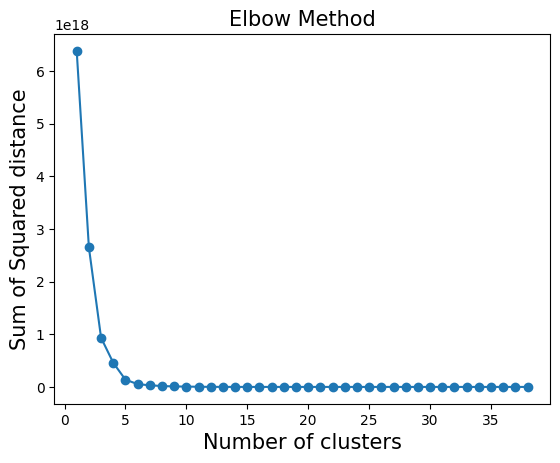

In [13]:
a=[]
K=range(1,39)
for i in K:
    kmean=KMeans(n_clusters=i)
    kmean.fit(df)
    a.append(kmean.inertia_)

plt.plot(K,a,marker='o')
plt.title('Elbow Method',fontsize=15)
plt.xlabel('Number of clusters',fontsize=15)
plt.ylabel('Sum of Squared distance',fontsize=15)
plt.show()

In [14]:
kmeans = KMeans(n_clusters = 5,random_state = 111)
kmeans.fit(df)

KMeans(n_clusters=5, random_state=111)

In [15]:
pd.Series(kmeans.labels_).value_counts()

0    125965
3         3
1         2
4         2
2         1
Name: count, dtype: int64

In [16]:
df['cluster_label'] = kmeans.fit_predict(df)

In [17]:
df[df['cluster_label'] != 0]

,duration,protocoltype,service,flag,srcbytes,dstbytes,wrongfragment,hot,loggedin,numcompromised,...,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag,cluster_label
1038,35682,1,60,3,381709090,0,0,0,0,0,...,0.12,0.08,0.0,0.00,0.00,0.08,0.50,15,9,3
43486,38259,1,10,3,621568663,0,0,0,0,0,...,0.08,0.03,0.0,0.00,0.00,0.03,1.00,15,11,3
44527,34578,1,49,3,1167519497,0,0,0,0,0,...,0.12,0.10,0.0,0.00,0.00,0.10,1.00,15,12,1
60570,2,1,18,2,693375640,0,0,1,0,0,...,0.09,0.22,0.0,0.18,0.67,0.05,0.33,15,17,3
62233,10999,1,44,4,0,1309937401,0,0,0,0,...,0.65,1.00,0.0,0.00,0.00,1.00,1.00,15,10,2
71629,39930,1,49,4,0,400291060,0,0,0,0,...,0.50,1.00,0.0,0.00,0.00,1.00,1.00,15,10,4
95029,39869,1,49,4,0,400291060,0,0,0,0,...,0.50,1.00,0.0,0.00,0.00,1.00,1.00,15,10,4
125429,36071,1,19,3,1379963888,0,0,0,0,0,...,0.12,0.06,0.0,0.00,0.00,0.06,1.00,15,11,1


In [18]:
metrics.silhouette_score(df, kmeans.labels_)

0.9999030676495602

In [19]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [20]:
centroid_diff = np.diff(centroids, axis=0)
feature_importance = np.abs(centroid_diff)

In [21]:
avg_importance = np.mean(feature_importance, axis=0)  # Calculate average importance across clusters
sorted_indices = np.argsort(avg_importance)[::-1]

In [22]:
column_names = df.columns

# Get column names of respective features in descending order of importance
sorted_column_names = column_names[sorted_indices]

# Get feature importance scores in descending order of importance
sorted_importance_scores = avg_importance[sorted_indices]

# Print column names along with feature importance scores
for col_name, importance_score in zip(sorted_column_names, sorted_importance_scores):
    print(f"Feature: {col_name}, Importance: {importance_score}")

Feature: srcbytes, Importance: 919643442.5868634
Feature: dstbytes, Importance: 755042221.8903862
Feature: duration, Importance: 22066.301451792162
Feature: dsthostcount, Importance: 129.7041572394448
Feature: count, Importance: 29.986428439116686
Feature: dsthostsrvcount, Importance: 29.040063708172923
Feature: service, Importance: 11.776811680493264
Feature: srvcount, Importance: 6.893223977559906
Feature: lastflag, Importance: 3.5428128183754746
Feature: flag, Importance: 1.911724817740378
Feature: attack, Importance: 1.0936986464494103
Feature: dsthostrerrorrate, Importance: 0.713036584236362
Feature: dsthostsamesrcportrate, Importance: 0.6920901440876434
Feature: dsthostsrvrerrorrate, Importance: 0.4149516730837932
Feature: dsthostdiffsrvrate, Importance: 0.3809318990724937
Feature: rerrorrate, Importance: 0.35168945077336294
Feature: srvrerrorrate, Importance: 0.33138347292237263
Feature: samesrvrate, Importance: 0.24310491670966802
Feature: hot, Importance: 0.21777014779237575
F